# Task # 4 - To Explore Decision Tree Algorithm

## Decision Tree 

 Decision tree is the most powerful and popular tool for classification and prediction. A Decision tree is a flowchart like tree structure, where each internal node denotes a test on an attribute, each branch represents an outcome of the test, and each leaf node (terminal node) holds a class label.Decision trees can handle high dimensional data. In general decision tree classifier has good accuracy. Decision tree induction is a typical inductive approach to learn knowledge on classification.



## Problem Statement

For the given ‘Iris’ dataset, create the Decision Tree classifier and visualize it graphically. The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly.

## Import necessary libraries

In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Import the dataset

EDA : The dataset contains 150 rows and 6 columns the columns are SepalLenght,SepalWidth,PetalLenght,PetalWidth all the scales are in centemeter(cm) and the last row is Species which determine weather the flower is Setosa, Versicolor or Virginica.<br>
The data distribution among setosa, virginica, versicolor are equal so iris dataset is a Balanced dataset (as the number of data points for every class is 50).

Sepal length,Sepal width, Petal length, Petal width are called feature/Input-variable/Independent-variable
Species are called Labels/Dependent-variable/Output-variable/class-label/Response label

In [99]:
iris_data = pd.read_csv("Iris.csv",index_col=0)

In [100]:
# Viewed top 10 rows of the dataframe using head() method
iris_data.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
6,5.4,3.9,1.7,0.4,Iris-setosa
7,4.6,3.4,1.4,0.3,Iris-setosa
8,5.0,3.4,1.5,0.2,Iris-setosa
9,4.4,2.9,1.4,0.2,Iris-setosa


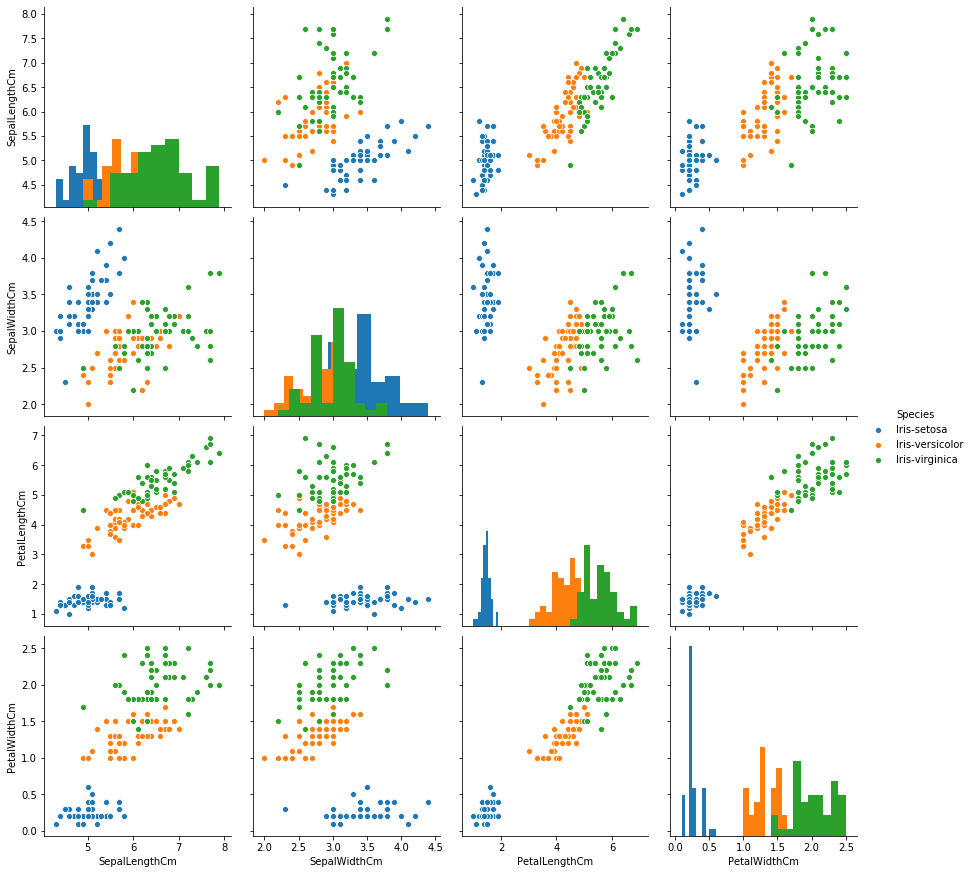

In [101]:
sns.pairplot(iris_data,hue="Species", height=3, diag_kind="hist")

From the pairplot, we can see that the Iris-setosa species is separataed from the other two across all feature combination

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000209AB185F08>,
      dtype=object)

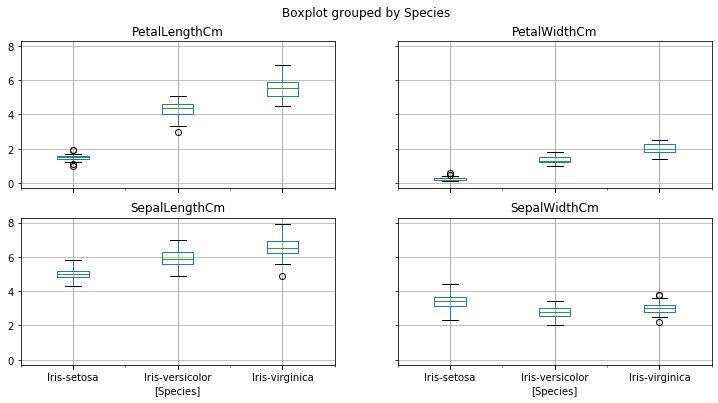

In [102]:
iris_data.boxplot(by="Species", figsize=(12, 6))

In [103]:
# Summary of the dataframe using info() method
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 12.0+ KB


In [15]:
# summary statistics of the dataframe using describe() method
iris_data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [104]:
# Dimensions of the dataframe using shape attribute
iris_data.shape

(150, 5)

## Preparing the data

Independent variable or input variable = Feature variable = x<br>
Dependent variable or output variable = Target variable = y

In [105]:
x = iris_data.drop("Species",axis=1)
y = iris_data["Species"]

## Split the datset

Split the data into training and test datasets, we'll do this by using Scikit-Learn's built-in train_test_split() method
The model learn the relationships from the training data and predict on the test data.i have split the data in 70:30 ratio

In [106]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.3, random_state=0)

## Traning the Algorithm

I have split the data into training and testing sets, and now i ll train the algorithm using DecisionTreeeClassifier method,then instaniate the Classifier and fit it on the traning set using the fit() method
In this step the model learned the relationships between the training data ie,x_train and y_train.

In [107]:
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier()
tree_model.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [108]:
# Score for the classifier
tree_model.score(x_test,y_test)

0.9777777777777777

##### Accuracy is 97%

## Predict the data

.Now the model is ready to make predictionson the test data using the predict() method

In [109]:
y_pred = tree_model.predict(x_test)
print(y_pred)

['Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-virginica' 'Iris-setosa' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa']


In [110]:
# Comparing actual vs predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df.head()

,Actual,Predicted
Id,,
115,Iris-virginica,Iris-virginica
63,Iris-versicolor,Iris-versicolor
34,Iris-setosa,Iris-setosa
108,Iris-virginica,Iris-virginica
8,Iris-setosa,Iris-setosa


## Predicting custom data

In [111]:
print("Predicted score for the given values is :",tree_model.predict([[5.1,5.7,5.3,0.1]]))

Predicted score for the given values is : ['Iris-setosa']


## Let us visualize the Decision Tree to understand it better.

Plotting the tree obtained using sklearn tree module

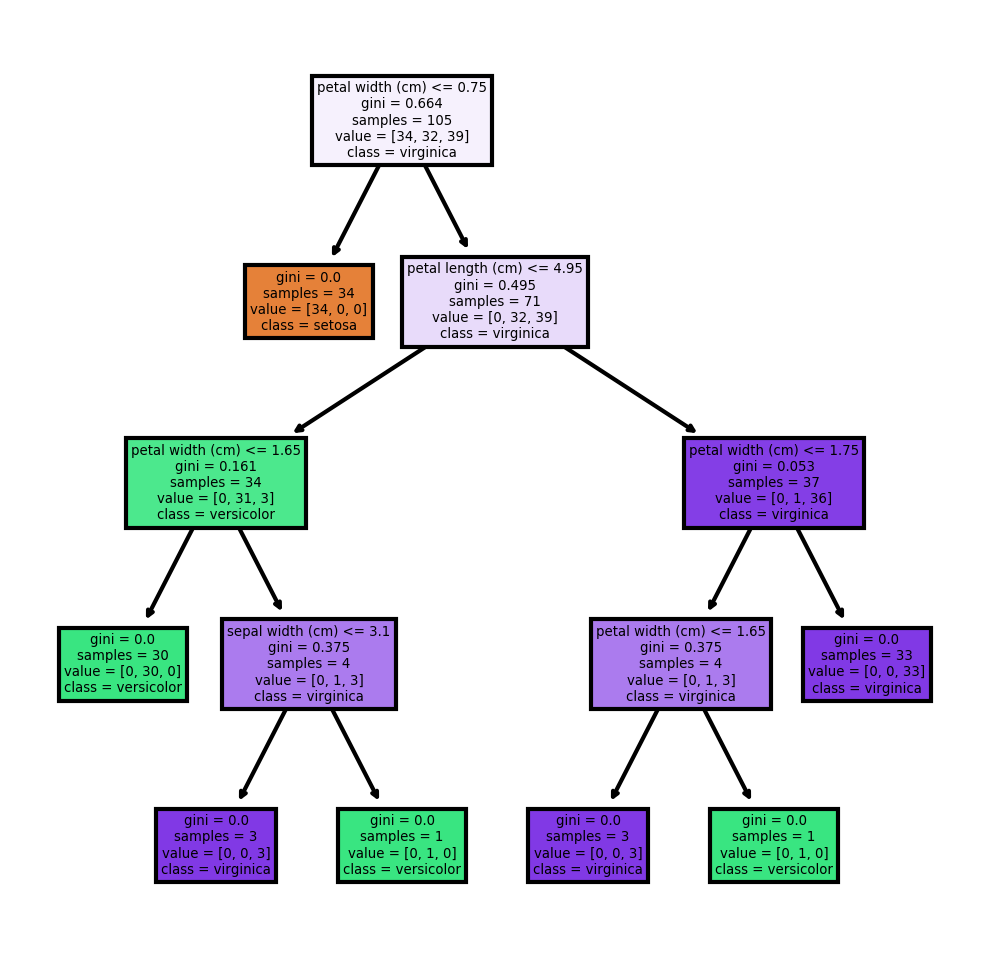

In [115]:
from sklearn import tree
fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn=['setosa', 'versicolor', 'virginica']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(tree_model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

## Conclusion

We made a model that predicts the species from the iris dataset using Decision tree calssifier where the accuracy was found to be 97% overall.And made a comparission between the actual and the predicted values which was found to be same in all the cases.And finally visualized the Decision tree classifier. 